In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncode

In [23]:
df=pd.read_csv("loan_approval_data.csv")

In [24]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [ ]:
df.dtypes

# HANDELING RAW DATA

In [38]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns

# handel missing data

In [6]:
num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])
cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

# EDA

Text(0.5, 1.0, 'Is Loan Approved or Not')

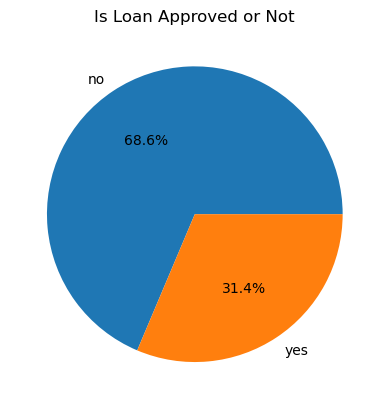

In [36]:
# how  balance our classes are
classes_count=df["Loan_Approved"].value_counts()
plt.pie(x=classes_count,labels=["no","yes"],autopct="%1.1f%%")
plt.title("Is Loan Approved or Not")

[Text(0, 0, '571'), Text(0, 0, '379')]

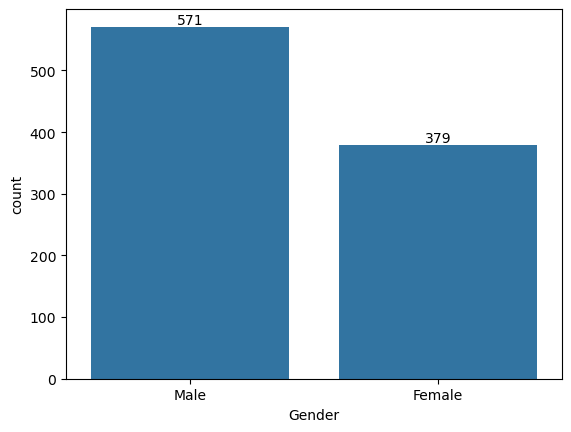

In [44]:
# analyse categories 
Gender_count=df["Gender"].value_counts()
ax=sns.barplot(Gender_count)
ax.bar_label(ax.containers[0])
plt.title("gender count ")

Text(0.5, 1.0, 'education level')

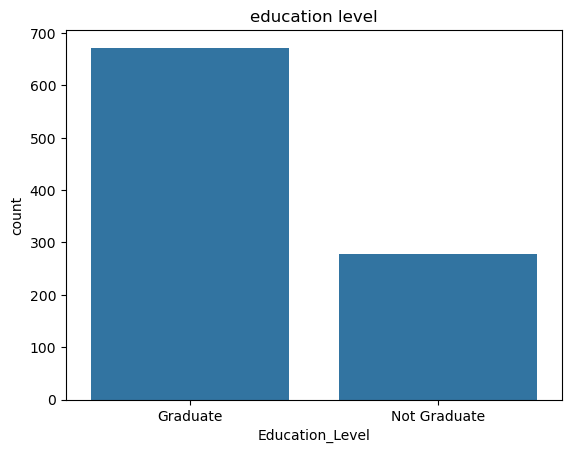

In [51]:
education_count=df["Education_Level"].value_counts()
ax=sns.barplot(education_count)
plt.title("education level")

<Axes: xlabel='Employment_Status', ylabel='count'>

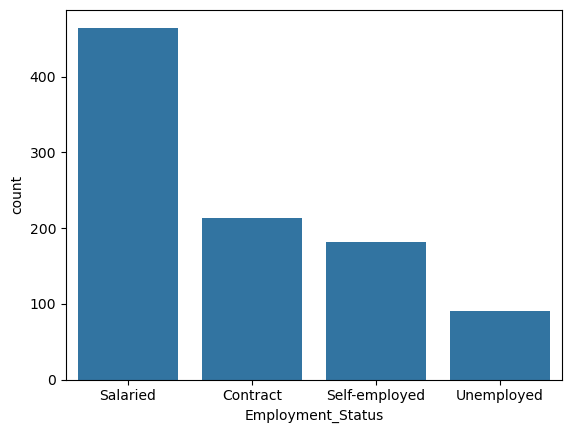

In [56]:
empl_count=df["Employment_Status"].value_counts()
sns.barplot(empl_count)

<Axes: xlabel='Employer_Category', ylabel='count'>

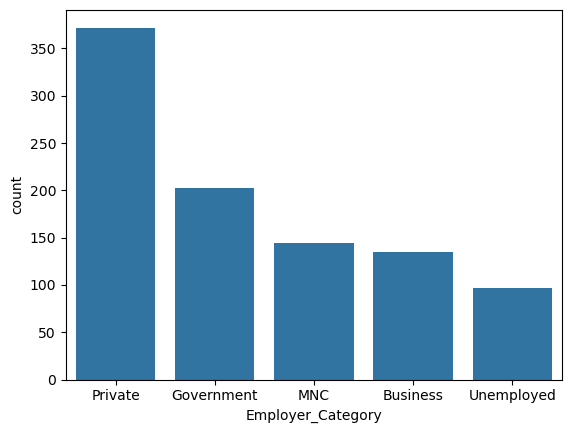

In [57]:
empcat_count=df["Employer_Category"].value_counts()
sns.barplot(empcat_count)

<Axes: xlabel='Property_Area', ylabel='count'>

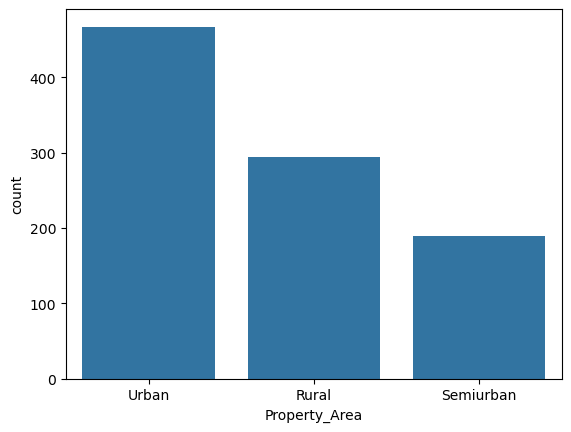

In [61]:
property_count=df["Property_Area"].value_counts()
sns.barplot(property_count)

<Axes: xlabel='Loan_Purpose', ylabel='count'>

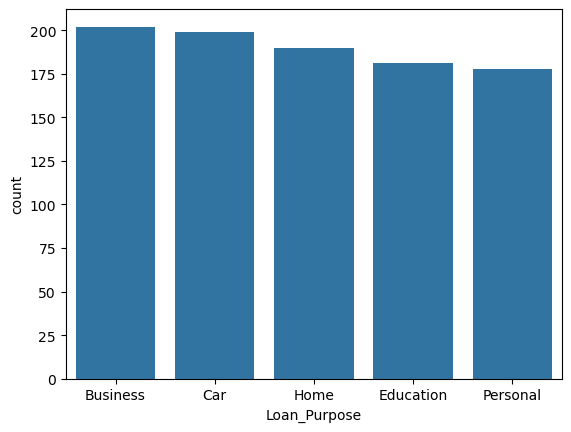

In [62]:
purpose_count=df["Loan_Purpose"].value_counts()
sns.barplot(purpose_count)

<Axes: xlabel='Marital_Status', ylabel='count'>

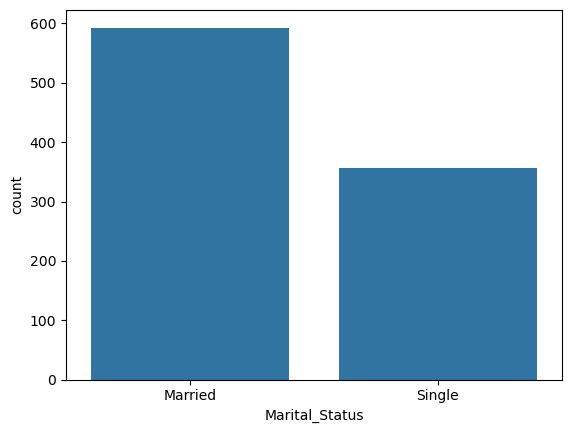

In [63]:
status_count=df["Marital_Status"].value_counts()
sns.barplot(status_count)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

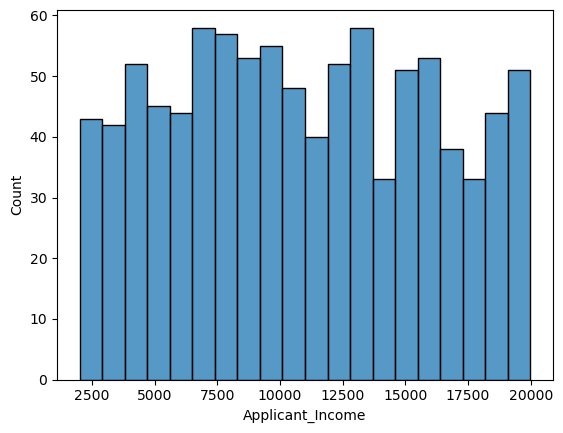

In [67]:
# analys income
sns.histplot(
    data=df,
    x="Applicant_Income",
    bins=20
)


<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

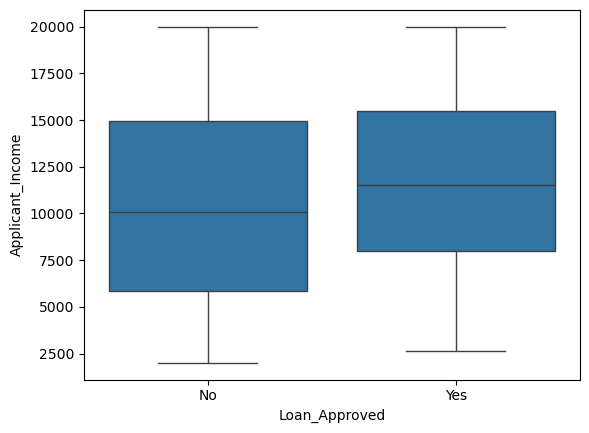

In [69]:
sns.boxplot(
    data=df,
    y="Applicant_Income",
    x="Loan_Approved",
   
)

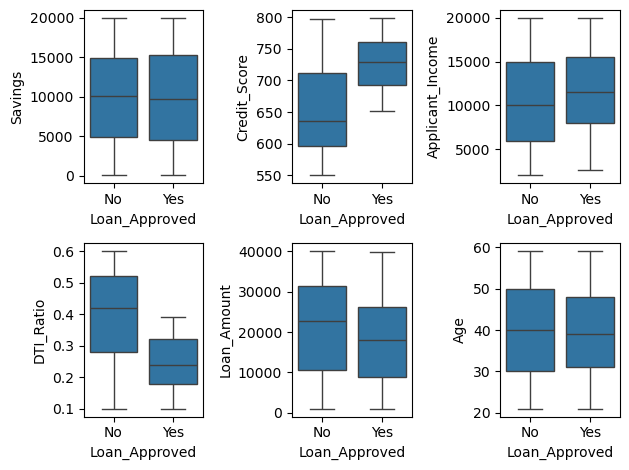

In [76]:
fig,axes=plt.subplots(2,3)
sns.boxplot(ax=axes[0,0],data=df,x="Loan_Approved",y="Savings")
sns.boxplot(ax=axes[1,0],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[0,2],data=df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[1,1],data=df,x="Loan_Approved",y="Loan_Amount")
sns.boxplot(ax=axes[1,2],data=df,x="Loan_Approved",y="Age")
fig.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

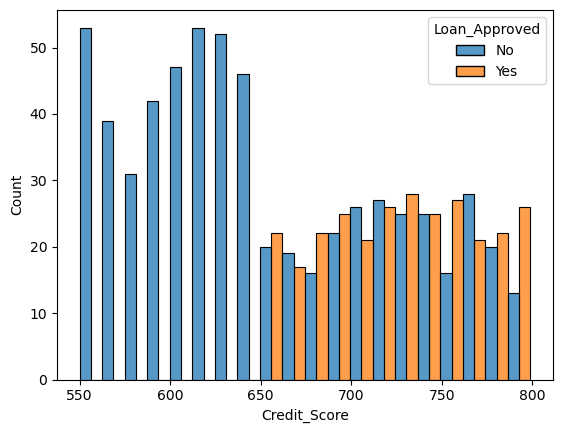

In [82]:
# credict score value for loan approved
sns.histplot(
    data=df,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

<Axes: xlabel='Applicant_Income', ylabel='Count'>

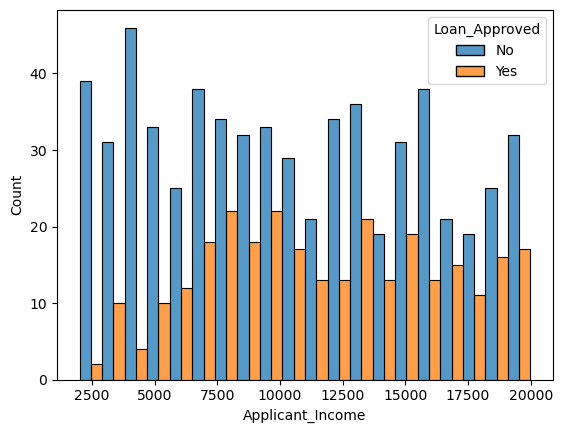

In [83]:
# applicant income
sns.histplot(
    data=df,
    x="Applicant_Income",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

 # HEATMAPS 

<Axes: >

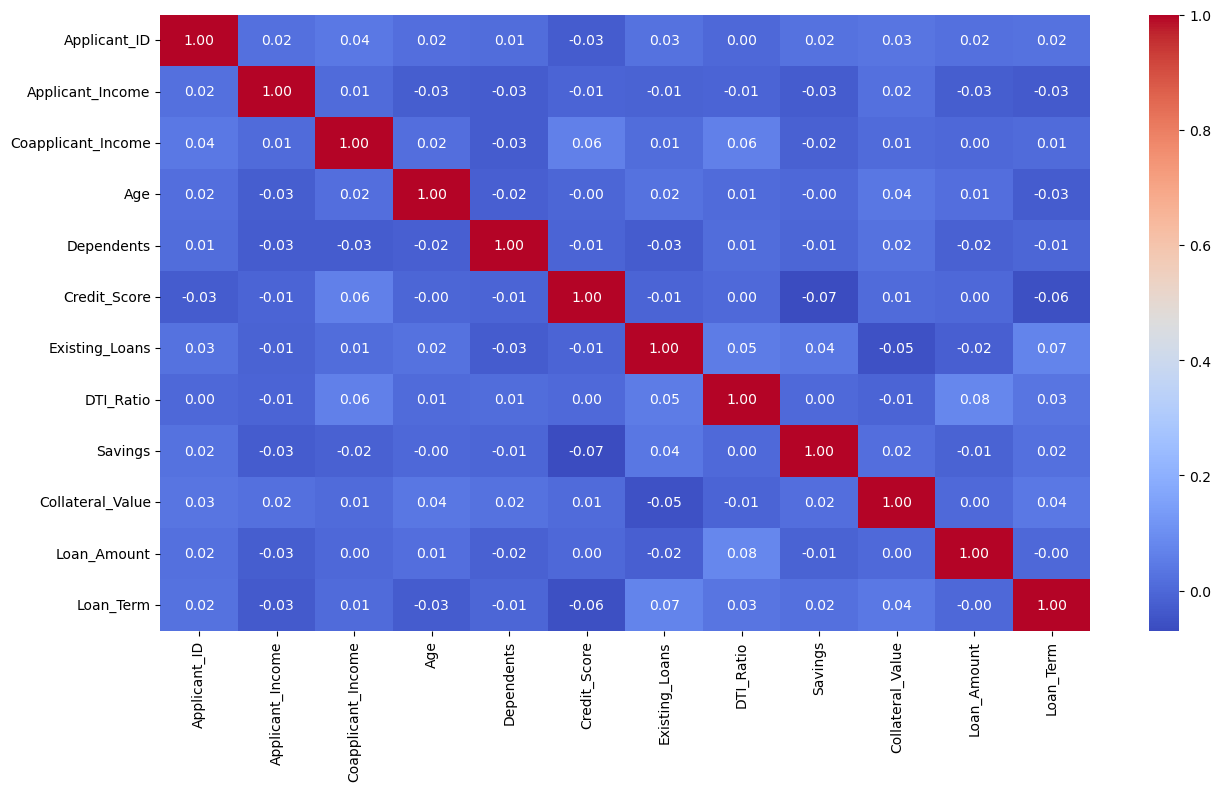

In [119]:
# to work on numerical data
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)


In [7]:
# Label Encoding for categorical value 
le=LabelEncoder()
df["Loan_Approved"]=le.fit_transform(df["Loan_Approved"])
df["Education_Level"]=le.fit_transform(df["Education_Level"])

In [8]:
#one hot encoding for categorical data
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]
ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
encoded = ohe.fit_transform(df[cols])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)
df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

 # TRAIN-TEST-SPLIT + TRAINING OF MODEL 

In [9]:
#data distribution
x=df.drop("Loan_Approved",axis=1)
y=df["Loan_Approved"]

In [10]:
# train test split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,train_size=0.2,random_state=42)

In [ ]:
# feature scaling

In [110]:
# using standardization for data
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# model:1 logistic regression

In [107]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


# model 2: KNN

In [112]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.5957446808510638
Recall:  0.45901639344262296
F1 score:  0.5185185185185185
Accuracy:  0.74
CM:  [[120  19]
 [ 33  28]]


# model 3:Naive Bayes

In [115]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.7966101694915254
Recall:  0.7704918032786885
F1 score:  0.7833333333333333
Accuracy:  0.87
CM:  [[127  12]
 [ 14  47]]


# best model on the basis of precision is Naive Bayes

# Feature Engineering

In [18]:
# Add or Tranform features that is affecting in large amount 
df["DTI_Ratio_sq"] = df["DTI_Ratio"] ** 2
df["Credit_Score_sq"] = df["Credit_Score"] ** 2

# to handel sweked value 
# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = df["Loan_Approved"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression

In [116]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7903225806451613
Recall:  0.8032786885245902
F1 score:  0.7967479674796748
Accuracy:  0.875
CM:  [[126  13]
 [ 12  49]]


# KNN

In [117]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.5957446808510638
Recall:  0.45901639344262296
F1 score:  0.5185185185185185
Accuracy:  0.74
CM:  [[120  19]
 [ 33  28]]


# Naive Bayes

In [118]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.7966101694915254
Recall:  0.7704918032786885
F1 score:  0.7833333333333333
Accuracy:  0.87
CM:  [[127  12]
 [ 14  47]]


 # Best model on the basis of precision is Naive Bayes after Feature Engineering